### Analysis of Spatial Accessibility to Healthcare Facilities in Sub-Saharan Cities

This code evaluates spatial accessibility to healthcare facilities within formal urban areas across 19 sub-Saharan African cities. It calculates the proportion of the population within a specified travel time to the nearest hospital, considering uncertainty in travel time estimations.

#### Key Steps in the Code:

1. **Data Loading and Preparation**: 
   - Load CSV files containing total population and population in service areas.
   - Specify parameters such as land use type (`Formal` or `Informal`), hospital category (`C0` for all health facilities or `C2` for just hospitals), travel time of interest (some value between `1` and `120` minutes), and uncertainty factor (`0.2` is set as default).

2. **City-Specific Calculations**: 
   - For each city, the code filters the data by land use and sorts by travel time.
   - It then computes upper and lower travel time boundaries based on the specified uncertainty factor.
   - Using interpolation, it calculates the population reachable within these adjusted time bounds.

3. **Normalization and Aggregation**:
   - The code normalizes populations by dividing by the maximum population within each city's formal areas.
   - A dictionary `specified_time_data` aggregates the normalized population and uncertainty-adjusted bounds for each city.

4. **Data Visualization**:
   - The code generates two plots:
     - A **population vs. time plot**, where each city’s normalized population over time is shown with a different line style for easy identification.
     - A **scatter plot with error bars** for each city's population share accessible within the specified time (see 1.), accounting for uncertainty bounds.

5. **Data Saving**:
   - The code saves `specified_time_data` to a CSV file for further use.
   - It also inverts normalized population values for alternate analysis and calculates the percentage of the population outside the target travel time for each city.

This analysis provides insights into spatial accessibility disparities in healthcare services across different cities and highlights potential areas for targeted urban planning and intervention.



Bad key mpl_toolkits.legacy_colorbar in file FST.mplstyle, line 757 ('mpl_toolkits.legacy_colorbar: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution
/var/folders/p0/6j2q4pb14hb28fbm50jjb7cc0000gn/T/ipykernel_14803/3162210431.py:11: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  plt.style.use("FST.mplstyle")
/var/folders/p0/6j2q4pb14hb28fbm50jjb7cc0000gn/T/ipykernel_14803/3162210431.py:11: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  plt.style.use("FST.mplstyle")
/var/folders/p0/6j2q4pb14hb28fbm50jjb7cc0000gn/T/ipykernel_14803/3162210431.py:11: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  plt.style.use("FST.mplstyle")
/var/folders/p0/6j2

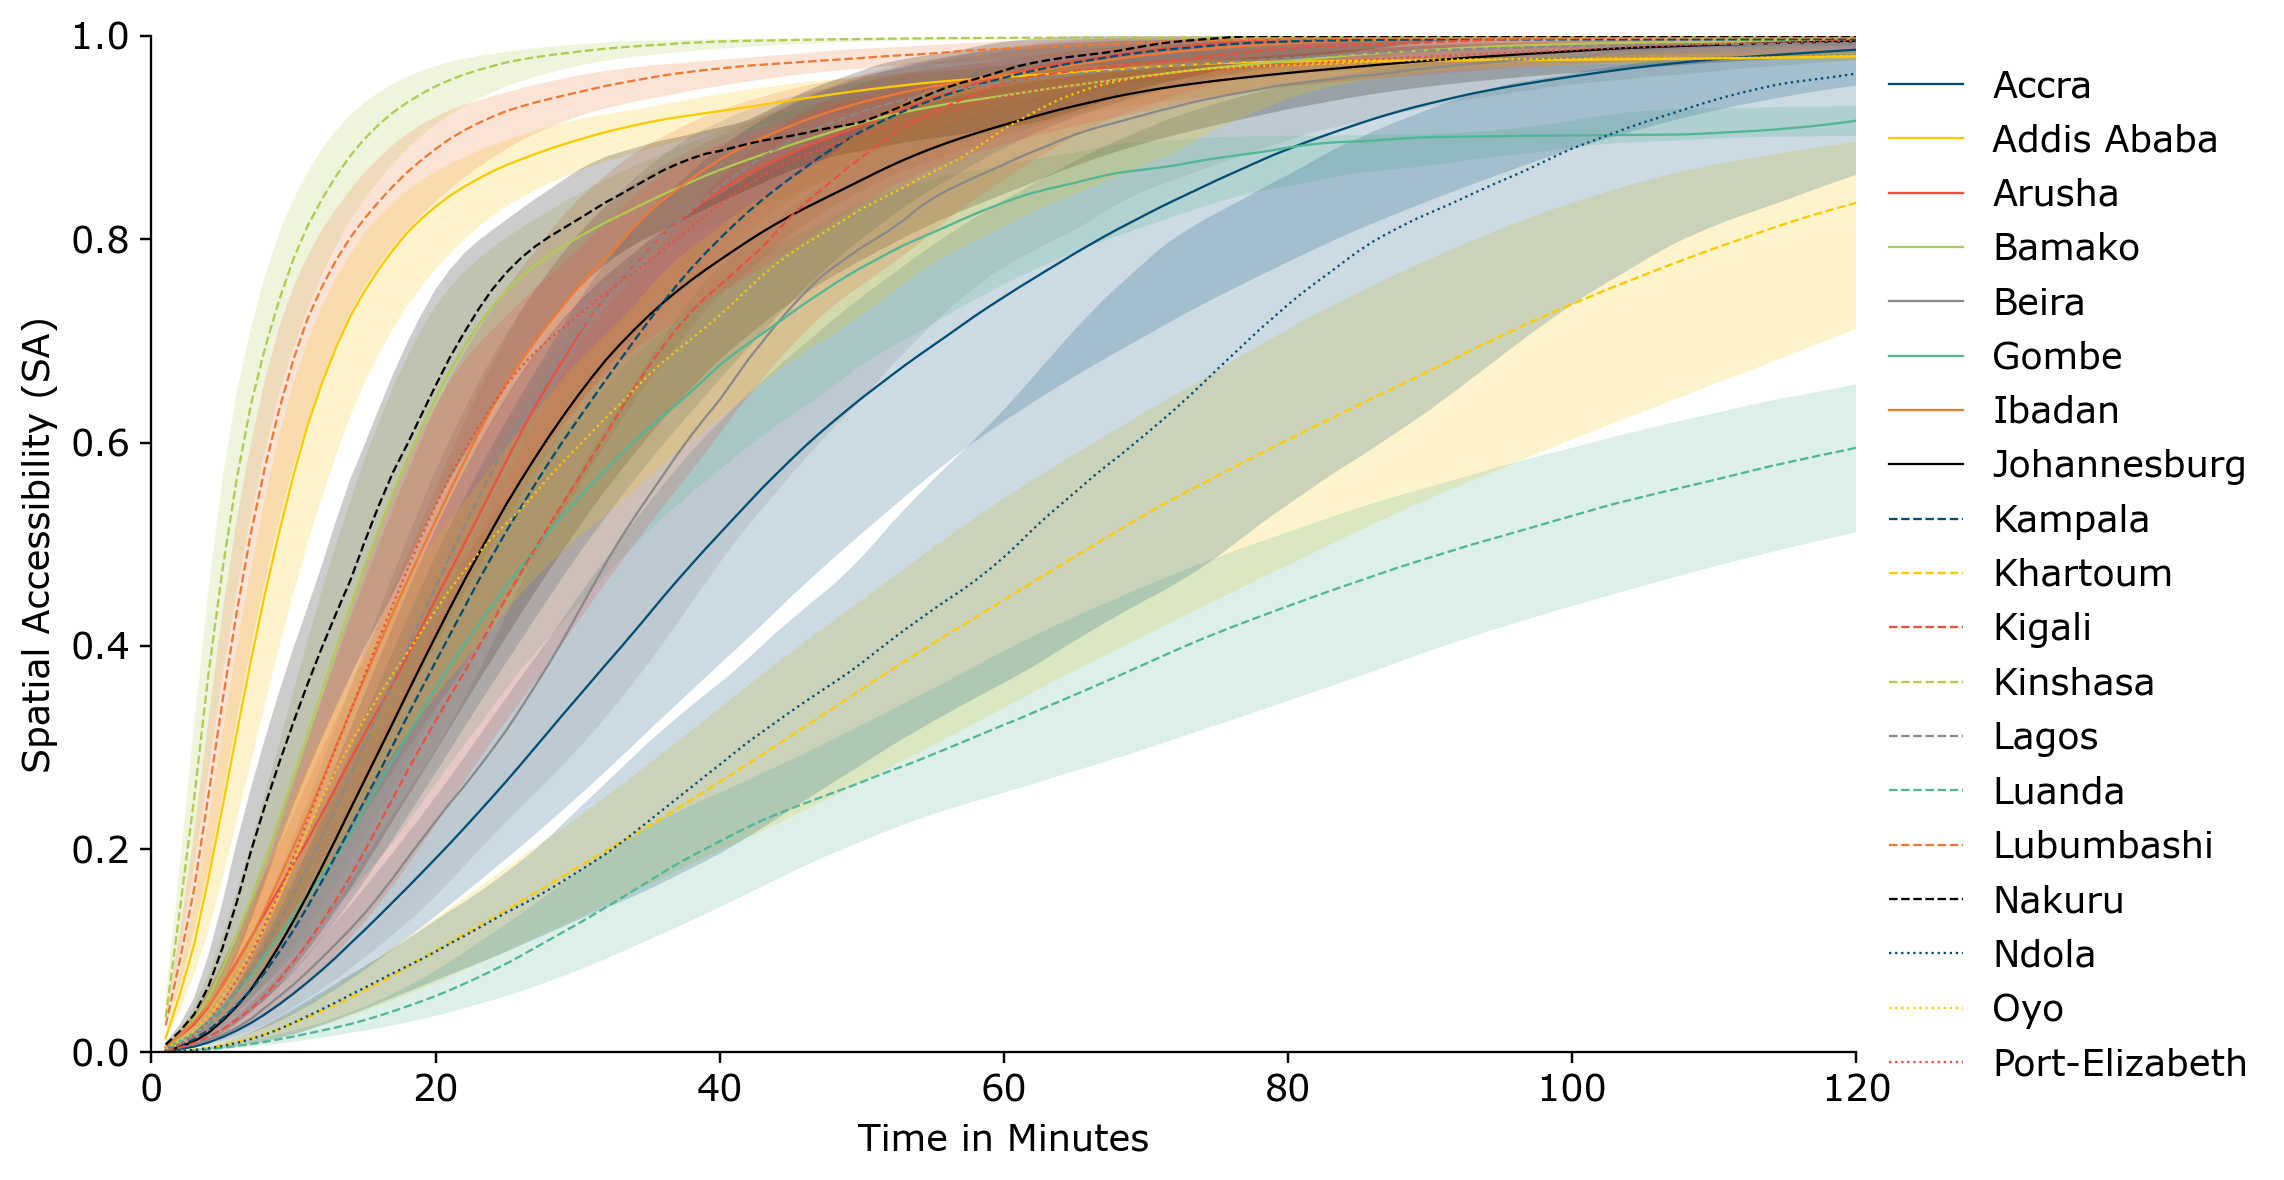

['Accra' 'Addis Ababa' 'Arusha' 'Bamako' 'Beira' 'Gombe' 'Ibadan'
 'Johannesburg' 'Kampala' 'Khartoum' 'Kigali' 'Kinshasa' 'Lagos' 'Luanda'
 'Lubumbashi' 'Nakuru' 'Ndola' 'Oyo' 'Port-Elizabeth']
              City  Normalized_Population  Lower_Uncertainty  \
0            Accra               0.986525           0.951332   
1      Addis Ababa               0.979863           0.976131   
2           Arusha               0.999921           0.999540   
3           Bamako               0.994956           0.990469   
4            Beira               0.991941           0.976222   
5            Gombe               0.916726           0.901677   
6           Ibadan               0.999562           0.998407   
7     Johannesburg               0.994759           0.981651   
8          Kampala               0.996827           0.996597   
9         Khartoum               0.835949           0.711535   
10          Kigali               0.999481           0.996846   
11        Kinshasa               0.99

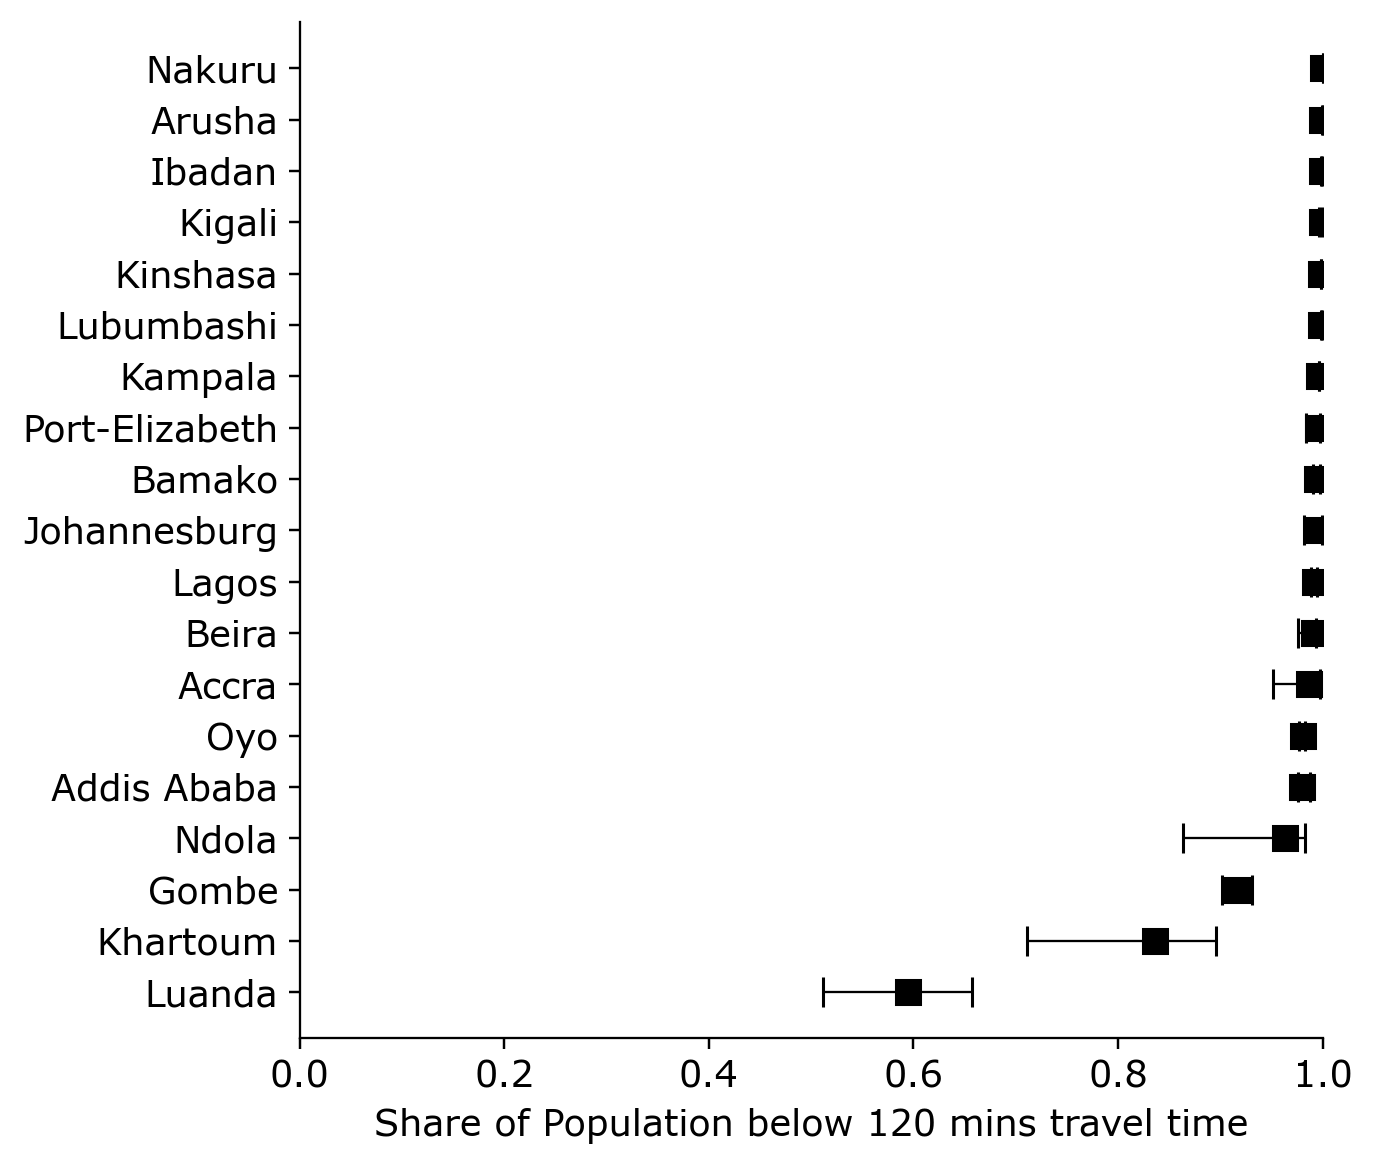

In [36]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 25 13:44:53 2023

@author: Friesen
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("FST.mplstyle")

uncertainty = 0.2
time_of_interest = 120
hospital = 'C0'

# Load the data from the first CSV file (with time information)
df1 = pd.read_csv(f'population_in_service_area_{hospital}.csv')

# Load the data from the second CSV file (without time information)
df2 = pd.read_csv(f'Total_Population.csv')
df2 = df2.drop('Time', axis=1)

# Merge the data from both CSV files based on 'City' and 'Landuse'
merged_df = pd.merge(df1, df2, on=['City', 'Landuse'])


total_df = merged_df
total_df = total_df.groupby(['City', 'Time'], as_index=False).agg({'Total_Population_x': 'sum', 'Total_Population_y': 'sum'})
total_df['Normalized']=total_df['Total_Population_x']/total_df['Total_Population_y']


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over unique cities and plot data for each city
cities = total_df['City'].unique()
i=1
for city in cities:
    if i < 9:
        linestyle = '-'
    elif i < 17:
        linestyle = '--'
    else:
        linestyle = ':'
    i = i+1
    city_data = total_df[total_df['City'] == city]
    # Calculate the lower and upper boundaries for time
    city_data['time_lower'] = city_data['Time'] - uncertainty * city_data['Time']
    city_data['time_upper'] = city_data['Time'] + uncertainty * city_data['Time']
    
    # Calculate the corresponding population for the lower and upper time bounds
    city_data['population_lower'] = np.interp(city_data['time_lower'], city_data['Time'], city_data['Normalized'])
    city_data['population_upper'] = np.interp(city_data['time_upper'], city_data['Time'], city_data['Normalized'])
    time = city_data['Time']
    population_x = city_data['Normalized']
    ax.plot(time, population_x, label=f'{city}', linestyle = linestyle)
    plt.fill_between(city_data['Time'], city_data['population_lower'], city_data['population_upper'], alpha=0.2)


# Add labels and legend
ax.set_xlabel('Time in Minutes')
ax.set_ylabel('Spatial Accessibility (SA)')
#ax.set_title('Total Population Over Time for All Cities')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,1)
plt.xlim(0,120)
# Show the plot
plt.show()
print(cities)

# Create a dataframe to store the normalized population and uncertainties for each city at the specified timestep
result_df = pd.DataFrame(columns=['City', 'Normalized_Population', 'Lower_Uncertainty', 'Upper_Uncertainty'])

# Initialize an empty list to store results
result_list = []

for city in cities:
    city_data = total_df[total_df['City'] == city]
    
    # Calculate the lower and upper boundaries for time
    time_lower = time_of_interest - uncertainty * time_of_interest
    time_upper = time_of_interest + uncertainty * time_of_interest
    
    # Calculate the corresponding population for the lower and upper time bounds
    normalized_lower = np.interp(time_lower, city_data['Time'], city_data['Normalized']).item()
    normalized_upper = np.interp(time_upper, city_data['Time'], city_data['Normalized']).item()
    
    # Append the result as a dictionary to the list
    result_list.append({
        'City': city,
        'Normalized_Population': np.interp(time_of_interest, city_data['Time'], city_data['Normalized']).item(),
        'Lower_Uncertainty': float(normalized_lower),
        'Upper_Uncertainty': float(normalized_upper)
    })

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_list)


# Display the resulting dataframe
print(result_df)

# Sort the result_df dataframe based on the 'Normalized_Population' column
result_df_sorted = result_df.sort_values(by='Normalized_Population', ascending=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot points for each city with error bars representing uncertainties
ax.errorbar(result_df_sorted['Normalized_Population'], range(len(result_df_sorted)),
            xerr=[result_df_sorted['Normalized_Population'] - result_df_sorted['Lower_Uncertainty'],
                  result_df_sorted['Upper_Uncertainty'] - result_df_sorted['Normalized_Population']],
            fmt='s', markersize=8, color='black', capsize=5)

# Add labels and title
ax.set_yticks(range(len(result_df_sorted)))
ax.set_yticklabels(result_df_sorted['City'])
ax.set_xlabel(f'Share of Population below {time_of_interest} mins travel time')
#ax.set_title(f'Normalized Population for Each City at {time_of_interest} mins with Uncertainties')
plt.xlim(0,1)
# Show the plot
plt.show()

# Convert and invert only numeric columns
result_df_sorted[result_df_sorted.columns.difference(['City'])] = result_df_sorted[result_df_sorted.columns.difference(['City'])].apply(pd.to_numeric, errors='coerce')
inverted_df = pd.concat([result_df_sorted[['City']], (1 - result_df_sorted[result_df_sorted.columns.difference(['City'])])*100], axis=1)





### Calculation and Visualization of Relative Risk in Healthcare Accessibility for Sub-Saharan Cities

This code computes the relative risk in healthcare accessibility between formal and informal areas across sub-Saharan African cities. Specifically, it compares the proportion of the population in each area type (formal vs. informal) that can reach healthcare facilities within a specified travel time of 15 minutes.

#### Code Overview:

1. **Data Loading**:
   - Load the total population data for each city, as well as pre-calculated accessibility data (`specified_time_data`) for formal and informal areas.
   - Aggregate city populations and load formal and informal data for the 15-minute threshold.

2. **Merging and Relative Risk Calculation**:
   - Merge the formal and informal accessibility data on the city name, creating a single DataFrame for analysis.
   - Calculate the **relative risk** as the ratio of accessible population shares (normalized populations) between formal and informal areas:
     - `Normalized_Population_Ratio` gives the relative accessibility risk between formal and informal areas.
     - `Population_upper_ratio` and `Population_lower_ratio` represent the uncertainty bounds for this risk measure, reflecting accessibility variability.

3. **Saving Results**:
   - Save the resulting data, including the calculated ratios and uncertainty intervals, to a CSV file for further analysis.

4. **Visualization**:
   - The code creates a plot for visualizing relative risk across cities:
     - **Relative Risk Plot**: For each city, the plot displays the `Normalized_Population_Ratio`, with error bars indicating uncertainty bounds.
     - A dashed line at relative risk = 1 marks the threshold where formal and informal accessibility is equal.
     - The x-axis is set to a logarithmic scale to better represent variations across cities.

   - This visualization highlights disparities in healthcare accessibility, allowing for comparison of relative risk across urban areas and identification of cities where informal areas face greater accessibility challenges.

This analysis provides critical insights into the relative accessibility of healthcare services in formal and informal urban settings, emphasizing areas where targeted interventions may be necessary to improve healthcare access equity.


          City  Normalized_Population_Formal  Population_Lower_Formal  \
0        Accra                      0.024332                 0.015519   
1  Addis Ababa                      0.248502                 0.175320   
2       Arusha                      0.146706                 0.112563   
3       Bamako                      0.130444                 0.096845   
4        Beira                      0.058107                 0.052227   

   Population_Upper_Formal  Normalized_Population_Informal  \
0                 0.038495                        0.023351   
1                 0.323146                        0.109510   
2                 0.181593                        0.067148   
3                 0.164355                        0.073910   
4                 0.061441                        0.009941   

   Population_Lower_Informal  Population_Upper_Informal  \
0                   0.014907                   0.034385   
1                   0.076941                   0.137468   
2          

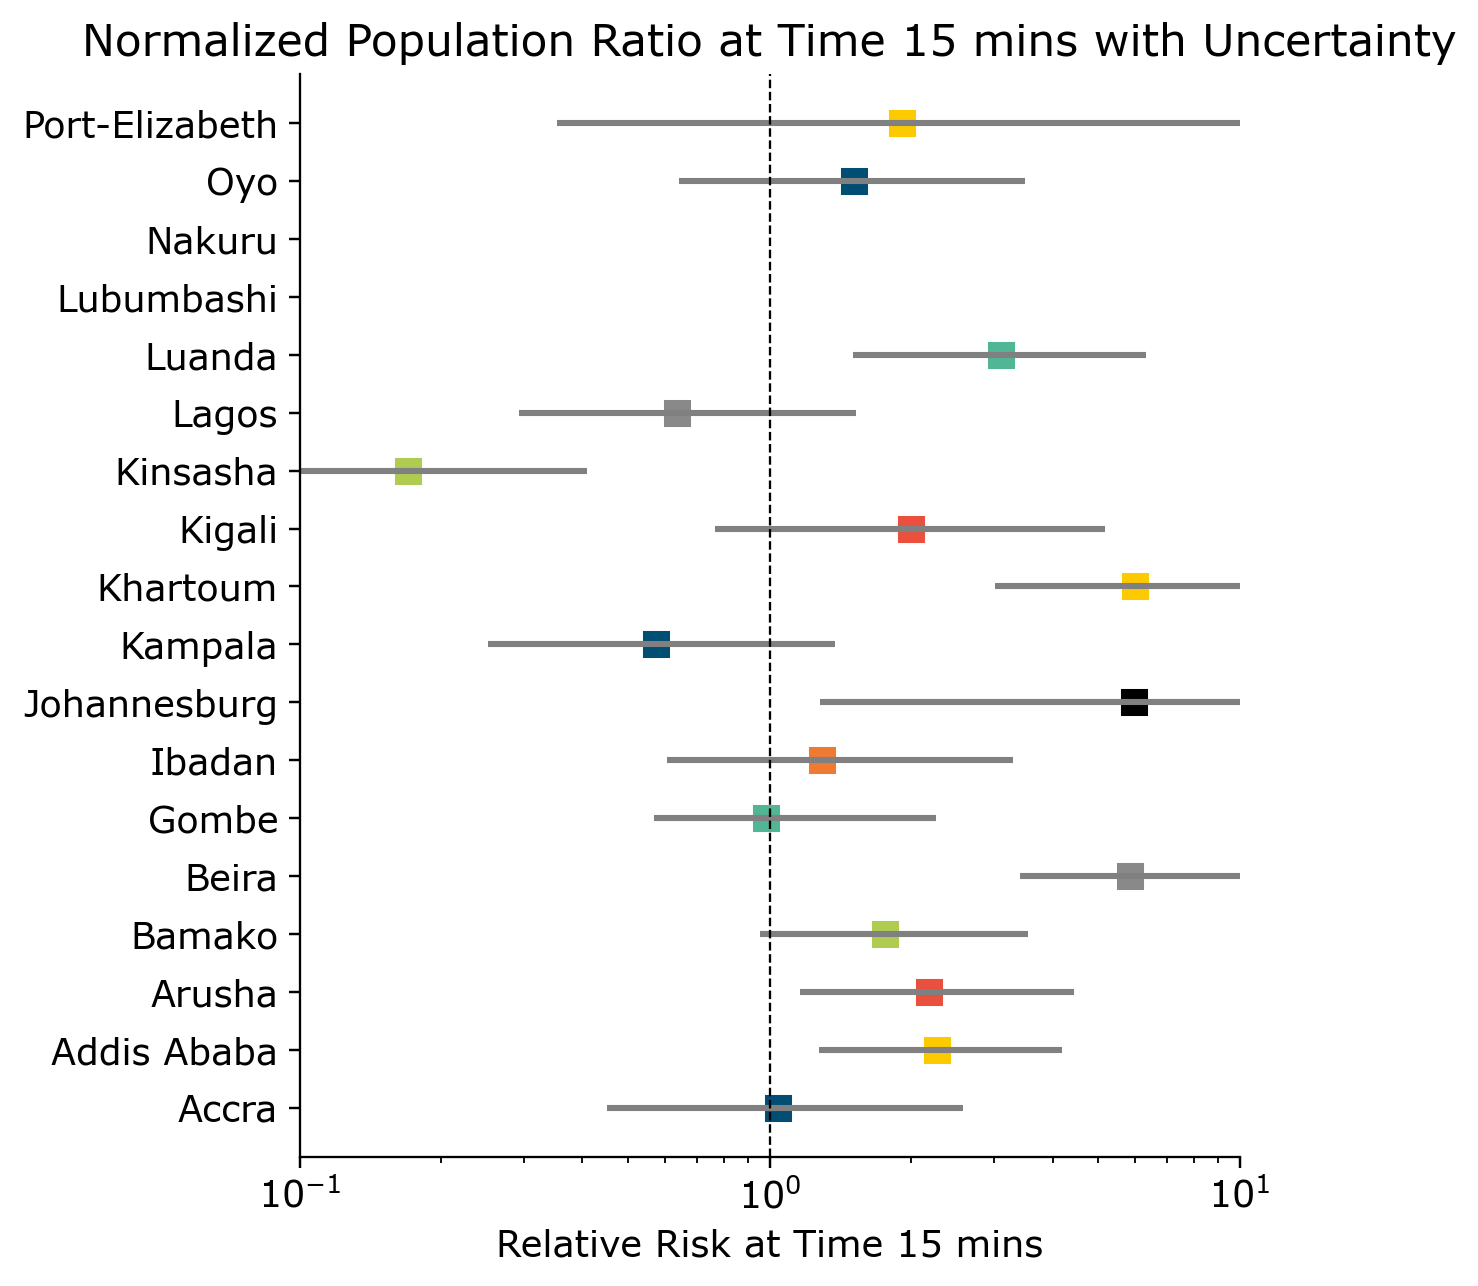

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 23 10:43:18 2024

@author: Friesen
"""
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 27 15:49:06 2023
 
@author: Friesen
"""

import pandas as pd
import matplotlib.pyplot as plt

# Read the total population data for each city
hospital = 'C2'
time = '15'
df_total_population = pd.read_csv(f'Total_Population.csv')
city_population = df_total_population.groupby('City')['Total_Population'].sum().reset_index()

# Load specified time data for Formal and Informal areas
file1 = f'specified_time_data_{hospital}_Formal_{time}_min.csv'
file2 = f'specified_time_data_{hospital}_Informal_{time}_min.csv'
df_formal = pd.read_csv(file1)
df_informal = pd.read_csv(file2)

# Merge the two DataFrames on the 'City' column
merged_df = pd.merge(df_formal, df_informal, on='City', suffixes=('_Formal', '_Informal'))

# Calculate the ratio of normalized populations and uncertainty intervals
merged_df['Normalized_Population_Ratio'] = merged_df['Normalized_Population_Formal'] / merged_df['Normalized_Population_Informal']
merged_df['Population_upper_ratio'] = merged_df['Population_Upper_Formal'] / merged_df['Population_Lower_Informal']
merged_df['Population_lower_ratio'] = merged_df['Population_Lower_Formal'] / merged_df['Population_Upper_Informal']

# Save the result to a new CSV file
result_file = f'population_ratio_with_uncertainty_{time}_{hospital}.csv'
merged_df.to_csv(result_file, index=False)

# Print the first few rows of the result
print(merged_df.head())

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Iterate over cities in the merged DataFrame
for i, city in enumerate(merged_df['City']):
    city_data = merged_df.loc[merged_df['City'] == city]

    # Extract relevant data for the current city
    normalized_population = city_data['Normalized_Population_Ratio'].values[0]
    lower = city_data['Population_lower_ratio'].values[0]
    upper = city_data['Population_upper_ratio'].values[0]

    # Plot the point for normalized population at the time of interest
    plt.plot(normalized_population, i, 's', markersize=8, label=city)

    # Plot uncertainty bars
    plt.hlines(i, lower, upper, color='gray', lw=2)

# Customize the plot
plt.axvline(x=1, color='black', linestyle='--')  # Plot a dashed line at the relative risk value 1
plt.yticks(range(len(merged_df['City'])), merged_df['City'])
plt.xlabel(f'Relative Risk at Time {time} mins')
plt.title(f'Normalized Population Ratio at Time {time} mins with Uncertainty')
plt.xlim(0.1, 10)  # Adjust the x-axis limits as needed
plt.tight_layout()
plt.xscale('log')

# Show the plot
plt.show()



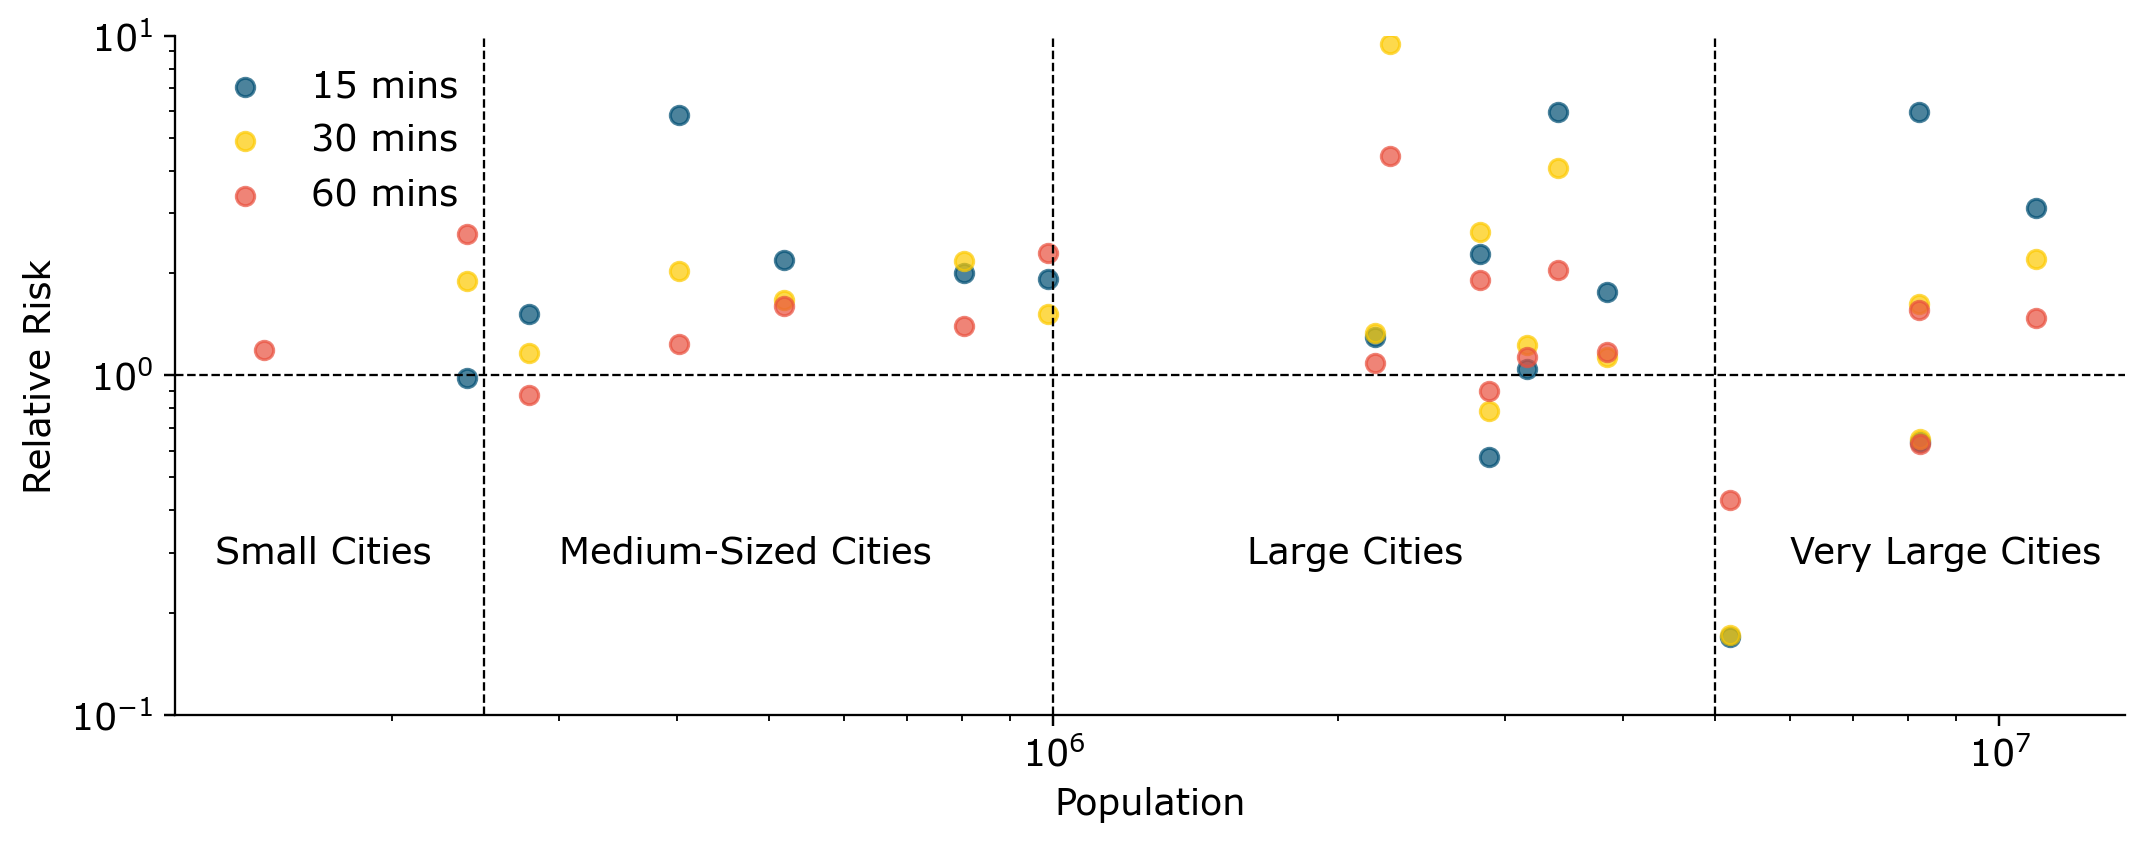

In [15]:
# Merge city_population DataFrame with the result DataFrame for each time
analysis_df = pd.merge(city_population, merged_df, on='City')

# List of times
times = ['15', '30', '60']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Iterate over each time
for time in times:
    # Load the CSV file for the current time
    file = f'population_ratio_with_uncertainty_{time}_{hospital}.csv'
    analysis_df = pd.read_csv(file)

    # Merge with city_population DataFrame to get 'Total_Population'
    analysis_df = pd.merge(city_population, analysis_df, on='City')

    # Scatter plot with different markers for each time
    ax.scatter(analysis_df['Total_Population'],
               analysis_df['Normalized_Population_Ratio'],
               label=f'{time} mins',
               alpha=0.7)

# Adding horizontal line at relative risk value 1
ax.axhline(y=1, color='black', linestyle='--')

# Adding vertical lines for population thresholds
ax.axvline(x=250000, color='black', linestyle='--')
ax.axvline(x=1000000, color='black', linestyle='--')
ax.axvline(x=5000000, color='black', linestyle='--')

# Adding text boxes between vertical lines
ax.text(130000, 0.3, 'Small Cities', rotation=0, verticalalignment='center')
ax.text(300000, 0.3, 'Medium-Sized Cities', rotation=0, verticalalignment='center')
ax.text(1600000, 0.3, 'Large Cities', rotation=0, verticalalignment='center')
ax.text(6000000, 0.3, 'Very Large Cities', rotation=0, verticalalignment='center')

# Setting x-axis and y-axis to log scale
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(0.1, 10)

# Adding labels and title
ax.set_xlabel('Population')
ax.set_ylabel('Relative Risk')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
